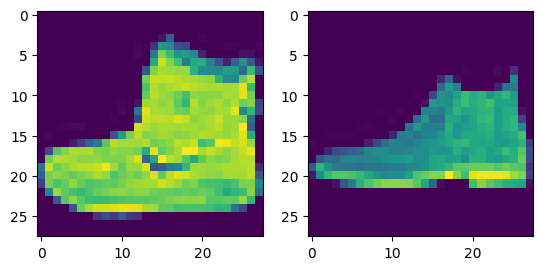

In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

train_dataset = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_dataset = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(train_dataset.data[0])
fig.add_subplot(1,2,2)
plt.imshow(test_dataset.data[0])

In [72]:
torch.manual_seed(0)
train_dataloader = DataLoader(train_dataset,
    batch_size=32,
    shuffle=True
)

model_0_1 = nn.Sequential(
    nn.Conv2d(1,10,3),
    nn.ReLU(),
    nn.Conv2d(10,10,3),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
)

model_0_2 = nn.Sequential(
    nn.Conv2d(10,10,3),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
)

model_0_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(250, 10),
)

model_0 = nn.Sequential(
    model_0_1,
    model_0_2,
    model_0_3
)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

epochs = 1000

for epoch in tqdm(range(epochs)):
    model_0.train()

    [data,labels] = next(iter(train_dataloader))

    logits = model_0(data)
    labels = F.one_hot(labels,len(train_dataset.classes)).type(torch.float)
    loss = criterion(logits, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % (epochs / 10) == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0 | Loss: 2.3047966957092285
Epoch: 100 | Loss: 1.1058776378631592
Epoch: 200 | Loss: 0.8232844471931458
Epoch: 300 | Loss: 0.4483908712863922
Epoch: 400 | Loss: 0.655351459980011
Epoch: 500 | Loss: 0.5489211678504944
Epoch: 600 | Loss: 0.6569841504096985
Epoch: 700 | Loss: 0.4005873203277588
Epoch: 800 | Loss: 0.5122277736663818
Epoch: 900 | Loss: 0.7478715777397156


Text(0.5, 1.0, 'Predicted: Trouser | Score: 100.00%')

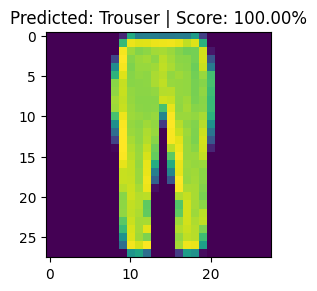

In [85]:
torch.manual_seed(0)
random_item_index = torch.randint(0, len(test_dataset), (1,)).item()
random_item = test_dataset[random_item_index]

img,_ = random_item

labelIndex = model_0(img.unsqueeze(dim=0))

highest_score_index = torch.argmax(labelIndex).item()
highest_score_percent = F.softmax(labelIndex, dim=1).squeeze()[highest_score_index].item() * 100
label = test_dataset.classes[highest_score_index]

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img.squeeze())
plt.title(f"Predicted: {label} | Score: {highest_score_percent:.2f}%")